In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"E:\Pandas EDA\Youtube EDA\UScomments.csv",on_bad_lines = 'skip' )

C:\Users\tirth\AppData\Local\Temp\ipykernel_6528\2377299392.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"E:\Pandas EDA\Youtube EDA\UScomments.csv",on_bad_lines = 'skip' )


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [4]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
df.likes.value_counts()

likes
0        456894
0        106858
1         61959
1         14650
2         13710
          ...  
16078         1
2419          1
817           1
6378          1
2292          1
Name: count, Length: 1284, dtype: int64

In [6]:
df[df.likes==0]

,video_id,comment_text,likes,replies
131072,sD6RIeNP41I,fuck ggg and the judges Canelo won,0,0
131073,sD6RIeNP41I,Good for Teddy,0,0
131074,sD6RIeNP41I,Canelo got outboxed,0,0
131075,sD6RIeNP41I,Wow,0,0
131076,sD6RIeNP41I,When you're woke asf lol,0,0
...,...,...,...,...
691393,EoejGgUNmVU,<3,0,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [7]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

__Sentiment Analysis__

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691374 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691374 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691374 non-null  object
 3   replies       691374 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


In [11]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from textblob import TextBlob

In [13]:
df.comment_text[0]

"Logan Paul it's yo big day ‼️‼️‼️"

In [14]:
TextBlob(df.comment_text[0]).sentiment.polarity

0.0

In [15]:
df['polarity']=df.comment_text.apply(lambda x:TextBlob(x).sentiment.polarity)

In [16]:
df.polarity.nunique()

21685

In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from wordcloud import WordCloud,STOPWORDS

In [20]:
df1=df[0:50000]

In [21]:
positive=df[df.polarity==1]


In [22]:
negative=df[df.polarity==-1]

In [23]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19390 entries, 64 to 691393
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      19390 non-null  object 
 1   comment_text  19390 non-null  object 
 2   likes         19390 non-null  object 
 3   replies       19390 non-null  object 
 4   polarity      19390 non-null  float64
dtypes: float64(1), object(4)
memory usage: 908.9+ KB


In [24]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3508 entries, 512 to 691224
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      3508 non-null   object 
 1   comment_text  3508 non-null   object 
 2   likes         3508 non-null   object 
 3   replies       3508 non-null   object 
 4   polarity      3508 non-null   float64
dtypes: float64(1), object(4)
memory usage: 164.4+ KB


In [25]:
# WordCloud(background_color='white',height=2000,width=4000,max_words=200).generate(title_c)

In [27]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [28]:
type(df.comment_text)
positive=positive.comment_text.dropna()
'  '.join(positive)

"yu are the best  Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.  YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D  This is priceless  Summed up perfectly  This is awesome. 1:20 XDDDDDDDDD  BEST MOVIE EVER!!!  Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.  The greatest movie about the greatest movie.  It's Harry guys he's Spiderman best friend  Best remake ever!  Great review!  awesome vlog  Subscribe to me if Roman Atwood is the best youtuber  I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever.  The best part of the movie was the credits  DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃  i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! t

In [29]:
positive='  '.join(positive)

In [30]:
negative=negative.comment_text.dropna()



In [31]:
negative='  '.join(negative)

In [32]:
po=WordCloud(stopwords=set(STOPWORDS),background_color='cyan',height=2000,width=4000,max_words=200).generate(positive)

In [33]:
no=WordCloud(stopwords=set(STOPWORDS),background_color='cyan',height=2000,width=4000,max_words=200).generate(negative)

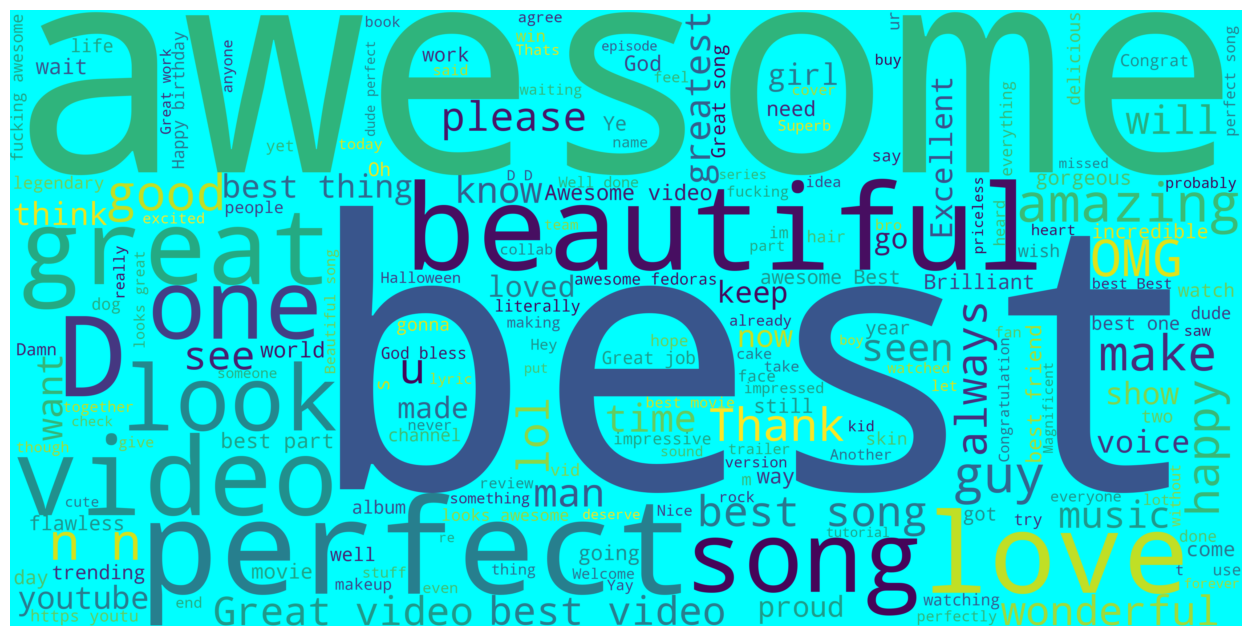

In [34]:
plt.figure(figsize=(16,8))
plt.imshow(po,interpolation='bilinear')
plt.axis('off')
plt.show()


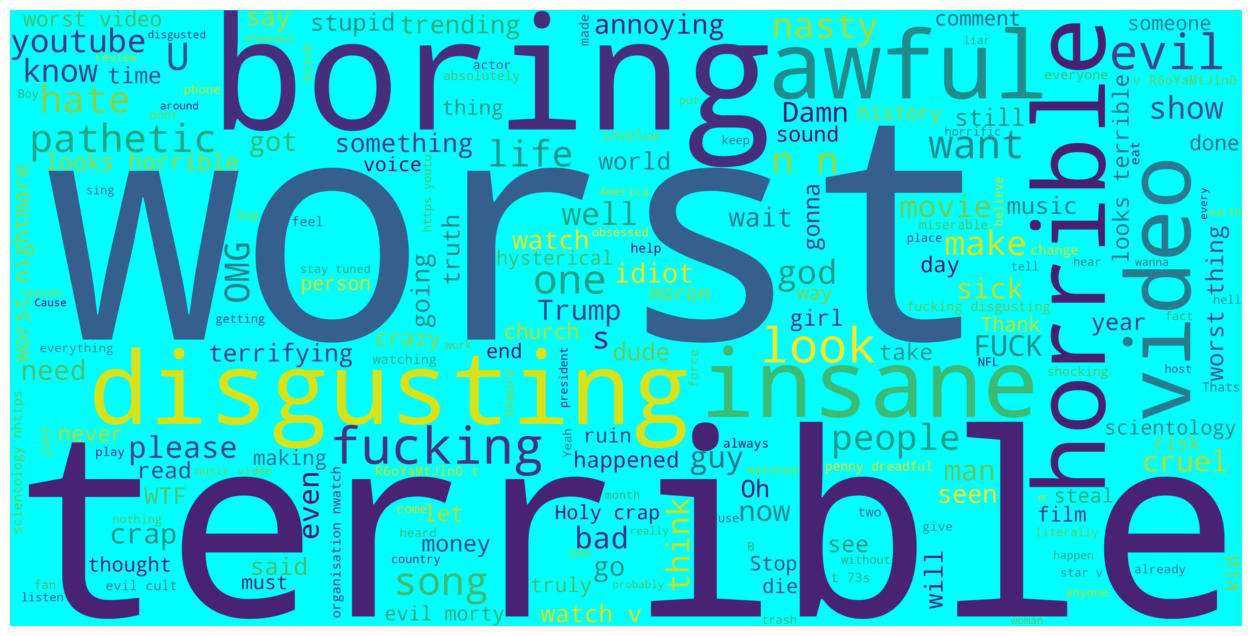

In [35]:
plt.figure(figsize=(16,8))
plt.imshow(no,interpolation='bilinear')
plt.axis('off')
plt.show()


__Emoji Analysis__

In [36]:
df.comment_text


0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [37]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import emoji


In [39]:
emoji.__version__

'2.8.0'

In [40]:
df.comment_text.head(5)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

In [41]:
l=[]
for i in df.comment_text.dropna():
    for j in i:
        if j in emoji.EMOJI_DATA:
            l.append(j)

In [42]:
l

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻',
 '❤',
 '😂',
 '❤',
 '💎',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😂',
 '😂',
 '😂',
 '😂',
 '😭',
 '😒',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '😊',
 '❤',
 '👈',
 '😂',
 '😂',
 '👌',
 '👌',
 '🤔',
 '👈',
 '😂',
 '😂',
 '😁',
 '💔',
 '😂',
 '👎',
 '👎',
 '👎',
 '👎',
 '👎',
 '🍎',
 '😤',
 '😂',
 '😂',
 '😂',
 '😂',
 '👈',
 '😭',
 '😭',
 '😭',
 '😢',
 '😢',
 '😢',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '💋',
 '💋',
 '👫',
 '💘',
 '😻',
 '💋',
 '💋',
 '💖',
 '💖',
 '💖',
 '💖'

In [43]:
from collections import Counter


In [44]:
emo=Counter(l).most_common(10)


In [45]:
emo

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [46]:
emo[0][1]

36987

In [47]:
x=[]
for i in range(0,10):
    x.append(emo[i][0])

In [48]:
x

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [49]:
emo[1][0]

'😍'

In [50]:
y=[]
for i in range(0,10):
    y.append(emo[i][1])
    

In [51]:
y

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [52]:
x

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [53]:
# y=[]
# for i in emo:
#     y.append[0][1]

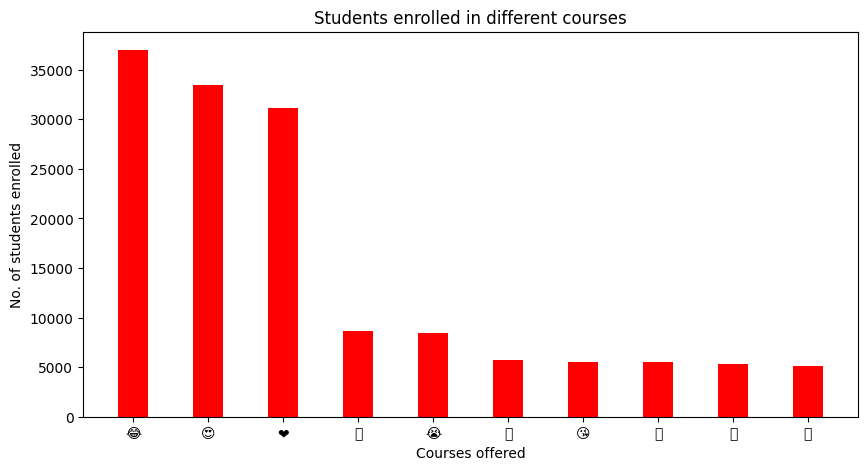

In [55]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='red', 
        width = 0.4)
 
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

In [56]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [57]:
trace=go.Bar(x=x,y=y)
iplot([trace])

In [58]:
import os

In [59]:
osl=os.listdir(r'E:\Pandas EDA\Yt ext data\additional_data')

In [60]:
osl

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json',
 'ytsample.sqlite']

In [61]:
l=[]
for i in osl:
    if '.csv' in i:
        l.append(i)


In [62]:
l

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [63]:
l

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [64]:
df

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
...,...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0,0.0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,0.0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,0.0
691398,EoejGgUNmVU,Islığı yeter...,0,0,0.0


In [65]:
del final_df

NameError: name 'final_df' is not defined

In [68]:
final_df=pd.DataFrame()

In [69]:
for i in l:
    cur_df=pd.read_csv(r'E:\Pandas EDA\Yt ext data\additional_data'+"\\"+i,encoding='latin_1',on_bad_lines='skip')
    final_df=pd.concat([final_df,cur_df],ignore_index=True)

In [70]:
final_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [71]:
final_df.shape

(375942, 16)

In [72]:
df1=final_df.copy()

In [73]:
df1

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [74]:
df1[df1.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40919,oWQuB2lVQLc,17.14.11,Zvezde Granda - Cela emisija 06 - ZG 2017/18 -...,Zvezde Granda,24,2017-11-12T00:02:41.000Z,"zvezde|""granda""|""hit""|""emisija""|""grand""|""2016""...",496192,1503,443,1020,https://i.ytimg.com/vi/oWQuB2lVQLc/default.jpg,False,False,False,ZvaniÄni portal: http://grand.online/\nFacebo...
40935,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick âº https://S...
40939,U3xLOo-CNwo,17.14.11,12 Weird Ways To Sneak Food Into Class / Back ...,Troom Troom,26,2017-11-12T15:00:05.000Z,"sneak food|""how to sneak food into class""|""cla...",3153224,28451,2285,3312,https://i.ytimg.com/vi/U3xLOo-CNwo/default.jpg,False,False,False,Subscribe Here: http://bit.ly/2uaz0on\n12 Hot ...
40989,YYOCmR5Lvbw,17.14.11,2017 Brazil Grand Prix: Race Highlights,FORMULA 1,17,2017-11-12T22:05:07.000Z,"F1|""Formula One""|""Formula 1""|""Sports""|""Sport""|...",758492,11936,160,1472,https://i.ytimg.com/vi/YYOCmR5Lvbw/default.jpg,False,False,False,"Lewis Hamilton starts from the back, Valtteri ..."
40991,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375905,UKserM-i0_A,18.14.06,Panic! At The Disco: High Hopes (Audio),Panic! At The Disco,10,2018-05-23T18:00:13.000Z,"Panic At The Disco|""Panic! At The Disco""|""PATD...",7676068,230427,3383,22924,https://i.ytimg.com/vi/UKserM-i0_A/default.jpg,False,False,False,I spent too long not setting my expectations h...
375922,hHaUQh6Gx-Q,18.14.06,"Mustard, Nick Jonas - Anywhere",MustardVEVO,10,2018-05-22T12:00:02.000Z,"Mustard|""Nick""|""Jonas""|""Anywhere""|""10""|""Summer...",2653229,48889,890,1181,https://i.ytimg.com/vi/hHaUQh6Gx-Q/default.jpg,False,False,False,Anywhere Out Now! http://smarturl.it/AnywhereM...
375927,Qcj15vHJTtk,18.14.06,Royal Wedding - SNL,Saturday Night Live,24,2018-05-20T04:58:51.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",8607264,66559,14179,8382,https://i.ytimg.com/vi/Qcj15vHJTtk/default.jpg,False,False,False,Footage from Prince Harry's (Mikey Day) weddin...
375932,pcJo0tIWybY,18.14.06,SZA - Garden (Say It Like Dat) (Official Video),SZAVEVO,10,2018-05-18T14:00:04.000Z,"Garden (Say It Like Dat)|""R&B""|""SZA""|""Top Dawg...",6004782,210802,4166,15169,https://i.ytimg.com/vi/pcJo0tIWybY/default.jpg,False,False,False,SZA's CTRL available on:Apple Music - http://s...


In [93]:
df1[df1.duplicated]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40919,oWQuB2lVQLc,17.14.11,Zvezde Granda - Cela emisija 06 - ZG 2017/18 -...,Zvezde Granda,24,2017-11-12T00:02:41.000Z,"zvezde|""granda""|""hit""|""emisija""|""grand""|""2016""...",496192,1503,443,1020,https://i.ytimg.com/vi/oWQuB2lVQLc/default.jpg,False,False,False,ZvaniÄni portal: http://grand.online/\nFacebo...
40935,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick âº https://S...
40939,U3xLOo-CNwo,17.14.11,12 Weird Ways To Sneak Food Into Class / Back ...,Troom Troom,26,2017-11-12T15:00:05.000Z,"sneak food|""how to sneak food into class""|""cla...",3153224,28451,2285,3312,https://i.ytimg.com/vi/U3xLOo-CNwo/default.jpg,False,False,False,Subscribe Here: http://bit.ly/2uaz0on\n12 Hot ...
40989,YYOCmR5Lvbw,17.14.11,2017 Brazil Grand Prix: Race Highlights,FORMULA 1,17,2017-11-12T22:05:07.000Z,"F1|""Formula One""|""Formula 1""|""Sports""|""Sport""|...",758492,11936,160,1472,https://i.ytimg.com/vi/YYOCmR5Lvbw/default.jpg,False,False,False,"Lewis Hamilton starts from the back, Valtteri ..."
40991,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375905,UKserM-i0_A,18.14.06,Panic! At The Disco: High Hopes (Audio),Panic! At The Disco,10,2018-05-23T18:00:13.000Z,"Panic At The Disco|""Panic! At The Disco""|""PATD...",7676068,230427,3383,22924,https://i.ytimg.com/vi/UKserM-i0_A/default.jpg,False,False,False,I spent too long not setting my expectations h...
375922,hHaUQh6Gx-Q,18.14.06,"Mustard, Nick Jonas - Anywhere",MustardVEVO,10,2018-05-22T12:00:02.000Z,"Mustard|""Nick""|""Jonas""|""Anywhere""|""10""|""Summer...",2653229,48889,890,1181,https://i.ytimg.com/vi/hHaUQh6Gx-Q/default.jpg,False,False,False,Anywhere Out Now! http://smarturl.it/AnywhereM...
375927,Qcj15vHJTtk,18.14.06,Royal Wedding - SNL,Saturday Night Live,24,2018-05-20T04:58:51.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",8607264,66559,14179,8382,https://i.ytimg.com/vi/Qcj15vHJTtk/default.jpg,False,False,False,Footage from Prince Harry's (Mikey Day) weddin...
375932,pcJo0tIWybY,18.14.06,SZA - Garden (Say It Like Dat) (Official Video),SZAVEVO,10,2018-05-18T14:00:04.000Z,"Garden (Say It Like Dat)|""R&B""|""SZA""|""Top Dawg...",6004782,210802,4166,15169,https://i.ytimg.com/vi/pcJo0tIWybY/default.jpg,False,False,False,SZA's CTRL available on:Apple Music - http://s...


In [75]:
df1.drop_duplicates()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375936,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ..."
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [78]:
df1=df1.drop_duplicates()

In [79]:
df1.shape

(339525, 16)

In [80]:
df1.sample(100)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
278607,4NGG2-PiNgw,18.20.03,Â¿CuÃ¡nto tomarÃ­a caminar al borde de la gala...,El Robot de PlatÃ³n,28,2018-03-19T18:09:49.000Z,"galaxias|""luna""|""lunar""|""apollo11""|""via lactea...",173820,17429,131,1152,https://i.ytimg.com/vi/4NGG2-PiNgw/default.jpg,False,False,False,Vuelve la secciÃ³n Algunas cosas sorprendentes...
283587,-0vcE2cNUE8,18.20.04,PROFECÃA DEL 18 DE ABRIL 2018 Â¿QUE VA A SUCE...,Olympos Tops,24,2018-04-18T16:00:28.000Z,"Fin del mundo|""18 de abril""|""18 abril""|""cuando...",338213,2648,1301,3235,https://i.ytimg.com/vi/-0vcE2cNUE8/default.jpg,False,False,False,Desde un rapto de la poblaciÃ³n mundial hasta ...
202604,iwjiYuwOK0E,18.01.03,èªåãã¢ã¤ãã«ã ã¨æã£ã¦ãããµã...,ãã©ã¤ã¢ã³ãã£ã³ãã«,23,2018-02-27T09:30:01.000Z,"ãã©ã¤ã¢ã³|""ã©ãã""|""ã¢ããã""|""å£...",870304,27285,520,4033,https://i.ytimg.com/vi/iwjiYuwOK0E/default.jpg,False,False,False,æ¯éçãããä½¿ã£ã¦ã¿ã¦ãã ããï...
239086,zrOu-RoRhlI,18.14.03,ë ì ë ë ¸ë¥´ì¨ì´ ì¤í¤ì ìë¤ì íê...,ìêµ­ë¨ì Korean Englishman,23,2018-03-10T11:56:50.000Z,"Korean|""ìêµ­ë¨ì""|""ìêµ­""|""ì¡°ì¬""|""ì¬ë¦...",706157,12504,193,1141,https://i.ytimg.com/vi/zrOu-RoRhlI/default.jpg,False,False,False,ì¤ëì ë ¸ë¥´ì¨ì´ì ì¤íë¤ê³¼ í¨ê» ...
69534,zy7lpVe9kzY,18.14.04,ÐÑÐ·ÑÐºÐ°Ð»ÑÐ½ÑÐµ Ð¡ÑÐ¸Ð»Ð¸ - ÐÐ¸Ð³Ð° Ð...,ÐÐ¸Ð³Ð° Ð¡Ð¼ÐµÑ Ð°,23,2018-04-13T19:14:15.000Z,"Ð»Ð¸Ð³Ð° ÑÐ¼ÐµÑ Ð° 2018|""Ð»Ð¸Ð³Ð° ÑÐ¼ÐµÑ Ð° ...",362043,5041,3054,2397,https://i.ytimg.com/vi/zy7lpVe9kzY/default.jpg,False,False,False,ÐÐ¸Ð³Ð° Ð¡Ð¼ÐµÑ Ð° 2018 - ÐÑÑÐ°Ñ Ð¸Ð³ÑÐ°...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117235,yaYILI3V9VQ,18.19.05,JEAN-LUC MÃLENCHON Ã L'ÃMISSION POLITIQUE -...,JEAN-LUC MÃLENCHON,25,2018-05-18T07:53:59.000Z,"Ã©mission politique|""france 2""|""mÃ©lenchon""|""s...",54020,3842,52,479,https://i.ytimg.com/vi/yaYILI3V9VQ/default.jpg,False,False,False,"Le jeudi 17 mai 2018, Jean-Luc MÃ©lenchon Ã©ta..."
368405,7wDUrQAaYsM,18.08.05,"Enrique Iglesias, Pitbull - MOVE TO MIAMI (Lyr...",EnriqueIglesiasVEVO,10,2018-05-03T12:00:01.000Z,"Enrique Iglesias x Pitbull|""Latin""|""MOVE TO MI...",2448853,70436,3197,3888,https://i.ytimg.com/vi/7wDUrQAaYsM/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
69986,ot4FpS0_XzA,18.16.04,Unlustige Bilder in Whatsapp Familiengruppen -...,Tommys lehrreiche Lehrfilme,24,2018-04-14T19:20:59.000Z,"tommys lehrreiche lehrfilme|""tommys liebliche ...",64661,6725,55,635,https://i.ytimg.com/vi/ot4FpS0_XzA/default.jpg,False,False,False,In der heutigen Folge von Ich liebe euch reden...
185763,S0ic4izwwiY,18.30.03,Shami à¤¨à¥ à¤®à¥à¤à¤¸à¥ à¤¬à¤¾à¤¤ à¤¨à¤¹...,Tez,25,2018-03-27T18:13:06.000Z,"Exciting News|""Tez News""|""Fast News""|""à¤à¤¤à¥...",296864,2208,568,1483,https://i.ytimg.com/vi/S0ic4izwwiY/default.jpg,False,False,False,Hasin Jahan Delhi along with his daughter has ...


In [81]:
pip install sqlalchemy 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from sqlalchemy import create_engine

In [84]:
en=create_engine(r'sqlite:///E:\Pandas EDA\Yt ext data\additional_data//ytsample.sqlite')

In [85]:
df2=df.sample(1000)

In [86]:
df2.to_sql('User',con=en,if_exists='append')

1000

In [89]:
en.connect()

In [90]:
conn = en.connect()
    #some simple data operations
conn.close()
en.dispose()

In [91]:
en

Engine(sqlite:///E:\Pandas EDA\Yt ext data\additional_data//ytsample.sqlite)

__Most liked__

In [92]:
df1.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [93]:
df1.category_id.unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [94]:
json_df=pd.read_json(r"E:\Pandas EDA\Yt ext data\additional_data\RU_category_id.json")

In [95]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
5,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
6,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
7,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
8,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
9,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [96]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [ ]:
# pd.json_normalize(data = data, record_path = "genres", meta = "id", record_prefix = "genre_")

In [97]:
import ast

In [98]:
# json_df['items'].apply(lambda x:ast.literal_eval(x) if isinstance(x,dict) else x)

In [99]:
# pd.json_normalize(data=json_df,record_path='items',record_prefix='items_')

In [129]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [140]:
json_df['items'].apply(lambda x : x['id']  if isinstance(x,dict) else np.nan)

0      1
1      2
2     10
3     15
4     17
5     18
6     19
7     20
8     21
9     22
10    23
11    24
12    25
13    26
14    27
15    28
16    30
17    31
18    32
19    33
20    34
21    35
22    36
23    37
24    38
25    39
26    40
27    41
28    42
29    43
30    44
Name: items, dtype: object

In [100]:
target=pd.json_normalize(json_df['items'])

In [101]:
target.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [102]:
tf=target.iloc[:,[2,4]]

In [103]:
tf.rename({'snippet.title':'myt'},inplace=True,axis=1)

C:\Users\tirth\AppData\Local\Temp\ipykernel_6528\752304916.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [186]:
tf.head()

,id,myt
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [104]:
tf['id']=tf['id'].apply(lambda x:pd.to_numeric(x))

C:\Users\tirth\AppData\Local\Temp\ipykernel_6528\691558081.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
tf

,id,myt
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [106]:
tf=dict(tf.values)

In [190]:
# tf.to_dict('dict')

In [153]:
df1.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [107]:
df1.category_id.map(tf)

AttributeError: 'dict' object has no attribute 'id'

In [159]:
tf=tf.set_index('id')

In [160]:
tf.head()

,snippet.title
id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [108]:
tf=tf.to_dict()

AttributeError: 'dict' object has no attribute 'to_dict'

In [109]:
tf

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [177]:
tf

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [179]:
df1.category_id

0         10
1         23
2         23
3         24
4         10
          ..
375936    22
375938    22
375939    24
375940     1
375941    20
Name: category_id, Length: 339525, dtype: int64

In [192]:
tf

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [110]:
df1['cat_name']=df1['category_id'].map(tf)

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339525 entries, 0 to 375941
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                339525 non-null  object
 1   trending_date           339525 non-null  object
 2   title                   339525 non-null  object
 3   channel_title           339525 non-null  object
 4   category_id             339525 non-null  int64 
 5   publish_time            339525 non-null  object
 6   tags                    339525 non-null  object
 7   views                   339525 non-null  int64 
 8   likes                   339525 non-null  int64 
 9   dislikes                339525 non-null  int64 
 10  comment_count           339525 non-null  int64 
 11  thumbnail_link          339525 non-null  object
 12  comments_disabled       339525 non-null  bool  
 13  ratings_disabled        339525 non-null  bool  
 14  video_error_or_removed  339525 non-null  

__Which Catagory have heigest amount of likes__

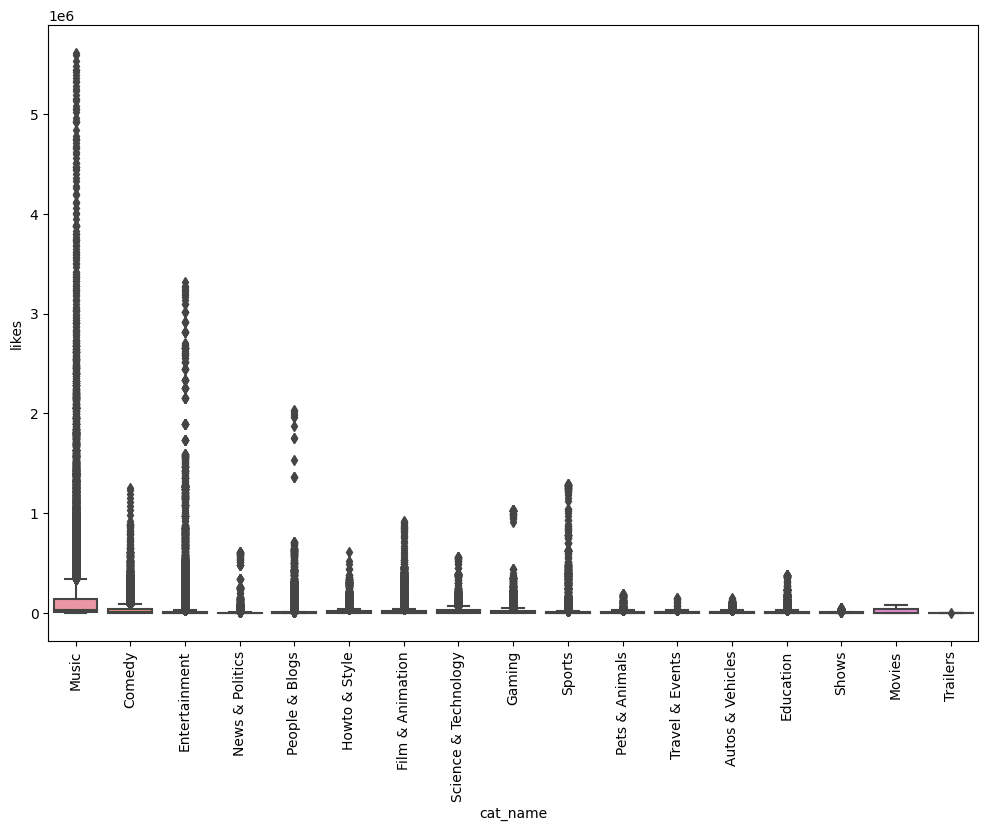

In [112]:
plt.figure(figsize=(12,8))
sns.boxplot(x='cat_name',y='likes',data=df1)
plt.xticks(rotation='vertical')
plt.show()

In [113]:
df1.groupby('cat_name')['likes'].size().sort_values(ascending=False)

cat_name
Entertainment           97365
People & Blogs          50164
Music                   36990
News & Politics         34599
Comedy                  24024
Sports                  21409
Film & Animation        18329
Howto & Style           17549
Gaming                  10433
Education                7396
Science & Technology     7350
Autos & Vehicles         4596
Pets & Animals           4215
Travel & Events          1631
Shows                     726
Movies                     22
Trailers                    5
Name: likes, dtype: int64

In [114]:
df1[df1.cat_name=='Entertainment']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,cat_name
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick âº https://S...,Entertainment
14,LUzsOyWp9lw,17.14.11,YOUTUBERS REACT TO TOP 10 TWITTER ACCOUNTS OF ...,FBE,24,2017-11-12T22:00:01.000Z,"twitter|""top 10""|""Taylor Swift""|""YOUTUBERS REA...",960747,31810,668,5335,https://i.ytimg.com/vi/LUzsOyWp9lw/default.jpg,False,False,False,CLICK TO SUBSCRIBE TO THE YOUTUBERS IN THIS EP...,Entertainment
17,8NHA23f7LvU,17.14.11,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...,Entertainment
21,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375917,XdNOI-q70q4,18.14.06,"GIANT Bowl of Lucky Charms CHALLENGE (5,000+ C...",Matt Stonie,24,2018-05-23T00:15:30.000Z,"Matt Stonie|""Megatoad""|""Competitive Eating""|""F...",2025376,50919,2127,8253,https://i.ytimg.com/vi/XdNOI-q70q4/default.jpg,False,False,False,Download Fortnite!! https://pixly.go2cloud.org...,Entertainment
375923,wI89nVn6LHk,18.14.06,Maddie Poppe Wins American Idol 2018 - Finale ...,American Idol,24,2018-05-22T04:08:24.000Z,"ABC|""americanidol""|""idol""|""american idol""|""rya...",2003345,19895,2831,3481,https://i.ytimg.com/vi/wI89nVn6LHk/default.jpg,False,False,False,Maddie Poppe the crowd the American Idol 2018 ...,Entertainment
375925,tiF9SzzzX_o,18.14.06,The Voice 2018 Brynn Cartelli - Finale: Skyfall,The Voice,24,2018-05-22T02:34:39.000Z,"the voice season 14|""the voice finale performa...",1437051,19930,1794,1671,https://i.ytimg.com/vi/tiF9SzzzX_o/default.jpg,False,False,False,Brynn Cartelli sings Adele's Skyfall during th...,Entertainment
375933,_QWZvU7VCn8,18.14.06,Brad Pitt Bid $120k For A Night With Emilia Cl...,The Graham Norton Show,24,2018-05-18T17:13:08.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",5564576,46351,2295,2861,https://i.ytimg.com/vi/_QWZvU7VCn8/default.jpg,False,False,False,Check out all that Emilia Clarke merch... Subs...,Entertainment


In [115]:
df1.likes

0          787425
1          127794
2          146035
3          132239
4         1634130
           ...   
375936     645888
375938      60008
375939      48068
375940     192957
375941     357079
Name: likes, Length: 339525, dtype: int64

In [116]:
df.likes.value_counts()

likes
0        456870
0        106856
1         61959
1         14650
2         13710
          ...  
16078         1
2419          1
817           1
6378          1
2292          1
Name: count, Length: 1284, dtype: int64

In [117]:
df1.groupby('cat_name')['likes'].sum().sort_values(ascending=False)

cat_name
Music                   5867826278
Entertainment           2377832055
Comedy                   931444449
People & Blogs           583368312
Film & Animation         437611281
Sports                   330258769
Howto & Style            306753785
Gaming                   251765515
Science & Technology     203111636
News & Politics          142013256
Education                105055435
Pets & Animals            47230769
Autos & Vehicles          43537811
Travel & Events           12389403
Shows                      3630978
Movies                      435777
Trailers                       198
Name: likes, dtype: int64

In [118]:
df1.groupby('cat_name')['likes'].mean().sort_values(ascending=False)

cat_name
Music                   158632.773128
Comedy                   38771.413961
Science & Technology     27634.236190
Entertainment            24421.835927
Gaming                   24131.651011
Film & Animation         23875.349501
Movies                   19808.045455
Howto & Style            17479.844151
Sports                   15426.165117
Education                14204.358437
People & Blogs           11629.222391
Pets & Animals           11205.401898
Autos & Vehicles          9472.978895
Travel & Events           7596.200490
Shows                     5001.347107
News & Politics           4104.547993
Trailers                    39.600000
Name: likes, dtype: float64

In [119]:
df1.groupby('cat_name')['likes'].size().sort_values(ascending=False)

cat_name
Entertainment           97365
People & Blogs          50164
Music                   36990
News & Politics         34599
Comedy                  24024
Sports                  21409
Film & Animation        18329
Howto & Style           17549
Gaming                  10433
Education                7396
Science & Technology     7350
Autos & Vehicles         4596
Pets & Animals           4215
Travel & Events          1631
Shows                     726
Movies                     22
Trailers                    5
Name: likes, dtype: int64

### Is Audience is engaged or not

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339525 entries, 0 to 375941
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                339525 non-null  object
 1   trending_date           339525 non-null  object
 2   title                   339525 non-null  object
 3   channel_title           339525 non-null  object
 4   category_id             339525 non-null  int64 
 5   publish_time            339525 non-null  object
 6   tags                    339525 non-null  object
 7   views                   339525 non-null  int64 
 8   likes                   339525 non-null  int64 
 9   dislikes                339525 non-null  int64 
 10  comment_count           339525 non-null  int64 
 11  thumbnail_link          339525 non-null  object
 12  comments_disabled       339525 non-null  bool  
 13  ratings_disabled        339525 non-null  bool  
 14  video_error_or_removed  339525 non-null  

In [121]:
df1['like_rate']=(df1.likes/df1.views)*100
df1['dislike_rate']=(df1.dislikes/df1.views)*100
df1['comment_rate']=(df1.comment_count/df1.views)*100

In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339525 entries, 0 to 375941
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                339525 non-null  object 
 1   trending_date           339525 non-null  object 
 2   title                   339525 non-null  object 
 3   channel_title           339525 non-null  object 
 4   category_id             339525 non-null  int64  
 5   publish_time            339525 non-null  object 
 6   tags                    339525 non-null  object 
 7   views                   339525 non-null  int64  
 8   likes                   339525 non-null  int64  
 9   dislikes                339525 non-null  int64  
 10  comment_count           339525 non-null  int64  
 11  thumbnail_link          339525 non-null  object 
 12  comments_disabled       339525 non-null  bool   
 13  ratings_disabled        339525 non-null  bool   
 14  video_error_or_removed  3

In [123]:
df1.loc[:,['like_rate','dislike_rate','comment_rate']]

,like_rate,dislike_rate,comment_rate
0,4.589104,0.253051,0.733639
1,12.594873,0.166363,1.284185
2,4.575843,0.167292,0.256342
3,6.309630,0.094903,0.835851
4,4.874563,0.062887,0.253752
...,...,...,...
375936,7.820293,0.049061,0.758070
375938,5.635623,0.035875,0.369648
375939,4.507286,0.096770,0.374326
375940,3.408645,0.050275,0.231204


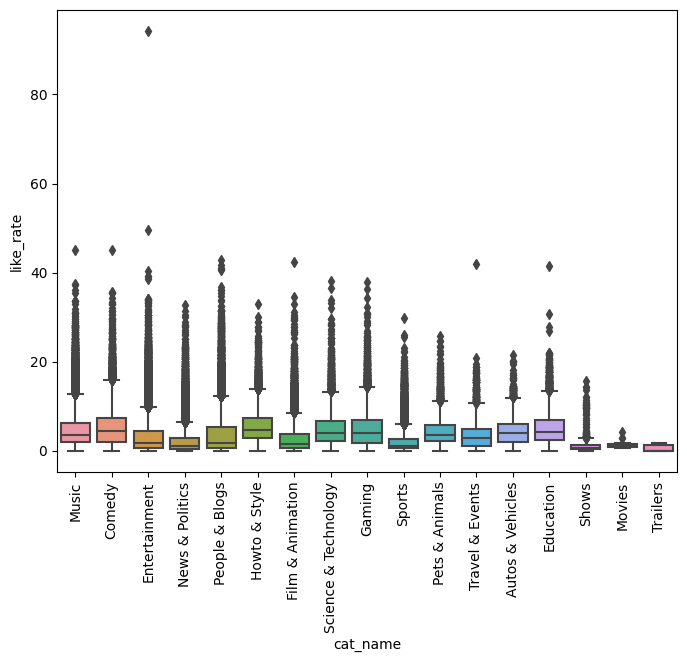

In [124]:
plt.figure(figsize=(8,6))
sns.boxplot(x='cat_name',y='like_rate',data=df1)
plt.xticks(rotation='vertical')
plt.show()

In [125]:
df1.cat_name.unique()

array(['Music', 'Comedy', 'Entertainment', 'News & Politics',
       'People & Blogs', 'Howto & Style', 'Film & Animation',
       'Science & Technology', 'Gaming', 'Sports', nan, 'Pets & Animals',
       'Travel & Events', 'Autos & Vehicles', 'Education', 'Shows',
       'Movies', 'Trailers'], dtype=object)

In [126]:
df1.cat_name.value_counts(dropna=False)

cat_name
Entertainment           97365
People & Blogs          50164
Music                   36990
News & Politics         34599
Comedy                  24024
Sports                  21409
Film & Animation        18329
Howto & Style           17549
Gaming                  10433
Education                7396
Science & Technology     7350
Autos & Vehicles         4596
Pets & Animals           4215
NaN                      2722
Travel & Events          1631
Shows                     726
Movies                     22
Trailers                    5
Name: count, dtype: int64

<Axes: xlabel='views', ylabel='likes'>

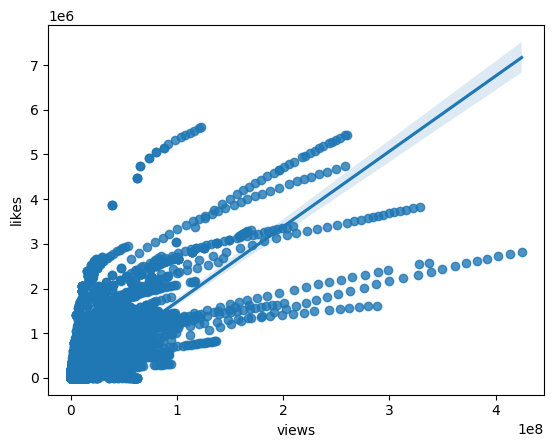

In [127]:
sns.regplot(x='views',y='likes',data=df1)

In [128]:
df1[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

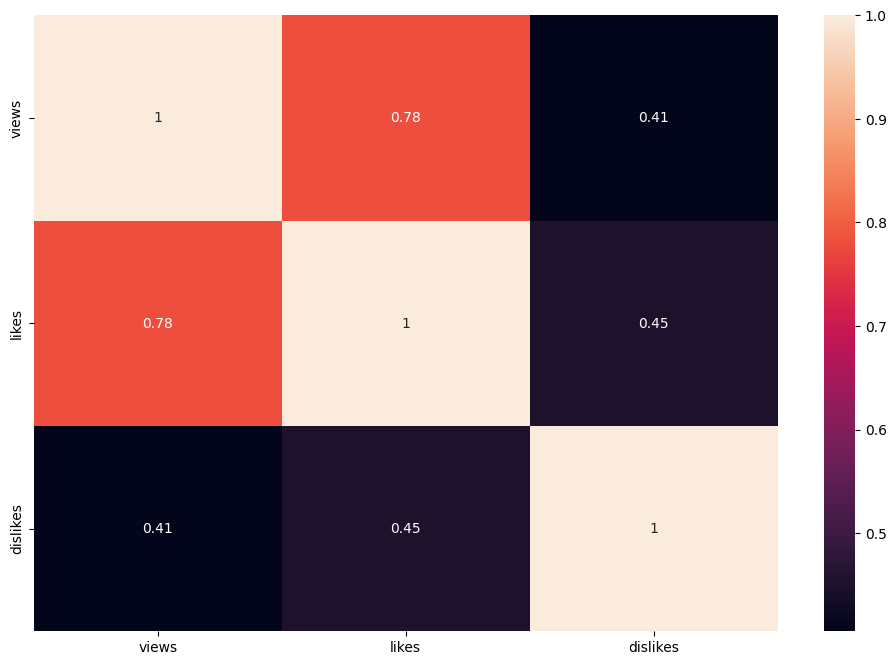

In [129]:
plt.figure(figsize=(12,8))
sns.heatmap(df1[['views','likes','dislikes']].corr(),annot=True)

### Which channel have largest Number of trending videos

In [130]:
df1.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,cat_name,like_rate,dislike_rate,comment_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


In [131]:
df1['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [132]:
cdf=df1.groupby('channel_title').size().sort_values(ascending=False).reset_index()

In [133]:
cdf.rename({0:'occ'},inplace=True,axis=1)

In [262]:
cdf

,channel_title,occ
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [134]:
import plotly.express as px

In [135]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='occ')

c:\Users\tirth\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning:

urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!



### Does punctuation have impact on views/likes/dislikes

In [136]:
df1.title[0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [137]:
import string

In [138]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [139]:
for i in df1.title[0]:
    if i in string.punctuation:
        print(i)

-
(
)
.


In [140]:
len([i for i in df1.title[0] if i in string.punctuation])

4

In [141]:
df1.title.apply(lambda x:len([i for i in x if i in string.punctuation]))

0         4
1         1
2         3
3         3
4         3
         ..
375936    0
375938    1
375939    3
375940    0
375941    1
Name: title, Length: 339525, dtype: int64

In [142]:
sam=df1.sample(10000)

In [146]:
sam['count_punc']=sam.title.apply(lambda x:len([i for i in x if i in string.punctuation]))

In [148]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 23598 to 305361
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                10000 non-null  object 
 1   trending_date           10000 non-null  object 
 2   title                   10000 non-null  object 
 3   channel_title           10000 non-null  object 
 4   category_id             10000 non-null  int64  
 5   publish_time            10000 non-null  object 
 6   tags                    10000 non-null  object 
 7   views                   10000 non-null  int64  
 8   likes                   10000 non-null  int64  
 9   dislikes                10000 non-null  int64  
 10  comment_count           10000 non-null  int64  
 11  thumbnail_link          10000 non-null  object 
 12  comments_disabled       10000 non-null  bool   
 13  ratings_disabled        10000 non-null  bool   
 14  video_error_or_removed  10000 non-null

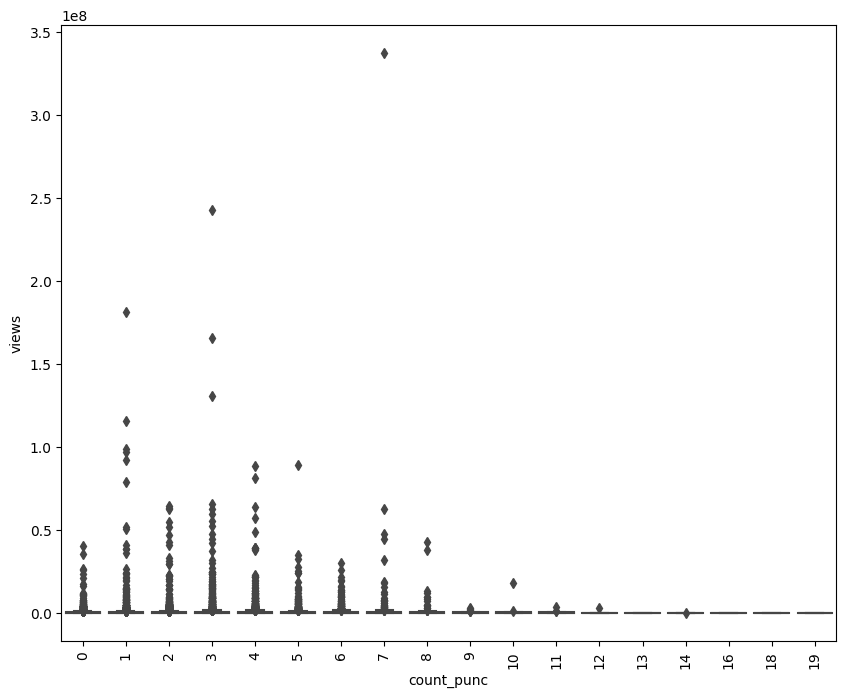

In [151]:
plt.figure(figsize=(10,8))
sns.boxplot(x='count_punc',y='views',data=sam)
plt.xticks(rotation='vertical')
plt.show()

In [152]:
sam[['count_punc','views']].corr()

,count_punc,views
count_punc,1.000000,0.044512
views,0.044512,1.000000


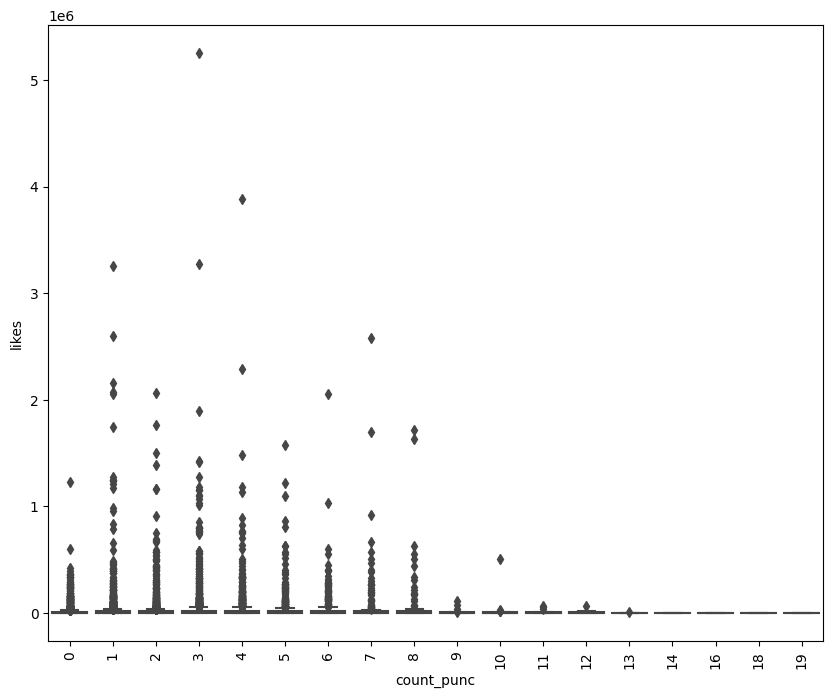

In [153]:
plt.figure(figsize=(10,8))
sns.boxplot(x='count_punc',y='likes',data=sam)
plt.xticks(rotation='vertical')
plt.show()